# ML-Fundamentals - Bias Variance Tradeoff

## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements) 
  * [Knowledge](#Knowledge) 
  * [Modules](#Python-Modules)
* [Exercise](#Exercise)
 * [Data Generation](#Data-Generation)
 * [Hypothesis](#Hypothesis)
 * [Plot](#Plot)
 * [Out of Sample Error](#Out-of-Sample-Error)
 * [Repeat](#Repeat)
 * [Average and Plot](#Average-and-Plot)
 * [Bias](#Bias)
 * [Variance](#Variance)
* [Summary and Outlook](#Summary-and-Outlook)
* [Literature](#Literature) 
* [Licenses](#Licenses)

## Introduction

If you completed the exercises *simple-linear-regression*, *multivariate-linear-regression* and *logistic-linear-regression* you know how to fit these models according to your training data.

This alone so far has no practical use case. The benefit of learning a model is to predict unseen data. Additionally, only with unseen data your model has not learnt from, it is possible to say if your model generalizes well or not. One way to measure this, is approximating the *out of sample error* $E_{out}$, which consists of the measures *bias*, *variance* and *irreducable error*.

In this notebook you will calculate two simple hypothesis for linear regression based on training data and compare them with the use of unseen validation data by calculating $E_{out}$, which can here decomposed into *bias* and *variance*.

## Requirements

### Knowledge

You should have a basic knowledge of:
- Univariate linear regression
- Out of sample error (bias variance)

Suitable sources for acquiring this knowledge are:
- [Simple Linear Regression Notebook](http://christianherta.de/lehre/dataScience/machineLearning/basics/univariate-linear-regression.php) by Christian Herta and his [lecture slides](http://christianherta.de/lehre/dataScience/machineLearning/linearRegression.pdf) (German)

- [Bias Variance Tradeoff](http://christianherta.de/lehre/dataScience/machineLearning/basics/bias-variance-tradeoff.php) by Christian Herta and his [lecture slides](http://christianherta.de/lehre/dataScience/machineLearning/bias-variance-tradeoff.pdf) (German)

- [numpy quickstart](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html)
- [Matplotlib tutorials](https://matplotlib.org/tutorials/index.html)

### Python Modules

By [deep.TEACHING](https://www.deep-teaching.org/) convention, all python modules needed to run the notebook are loaded centrally at the beginning. 


In [207]:
import numpy as np
import matplotlib.pyplot as plt

import hashlib

In [208]:
def round_and_hash(value, precision=4, dtype=np.float32):
    """ 
    Function to round and hash a scalar or numpy array of scalars.
    Used to compare results with true solutions without spoiling the solution.
    """
    rounded = np.array([value], dtype=dtype).round(decimals=precision)
    hashed = hashlib.md5(rounded).hexdigest()
    return hashed

## Exercise

Exercise inspired by lecture 8 from:
- Yaser Abu-Mostafa
 - [Learning from Data, Caltech Machine Learning](http://home.caltech.edu/telecourse.html) [ABU18a]
 - or directly at [here for the video](https://www.youtube.com/watch?v=zrEyxfl2-a8&hd=1) [ABU18b]

In this exercise, the target function $t(x)$ is the sin curve. Our task is to approximate the target using a constant function and linear regression, i.e. a straight line. To do so we need training samples from the model. A single training sample is a pair of points on the sin curve, generated as follows:
* $p(x)$ is the uniform distribution in the interval $[0,2\pi]$
* Two x-values $x^{(1)}$ and $x^{(2)}$ are drawn from $p(x)$
* The y-value is the target of x without any additional noise: $y^{(i)}= t(x^{(i)}) = sin(x^{(i)})$

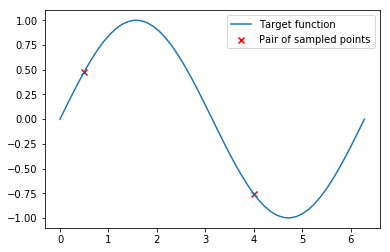

Using these two points, we'll try two different hypotheses to approximate the sin curve:
1. $$\mathcal H_1: h_1(x) = \theta_0 + \theta_1 x$$
    A straight line through the two points. The parameters $\theta_0$ and $\theta_1$ correspond to the y-intercept and slope of a [linear function](https://www.mathsisfun.com/algebra/linear-equations.html).
2. $$\mathcal H_2: h_2(x) = w$$
A constant, i.e. a line parallel to the x-axis. To get the constant-curve with minimum squared error just take for $w$ the mean of the y-values of the two sampled data points. 

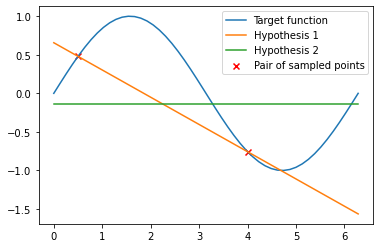

To judge which of the hypothesis does a better job of modeling the target, we'll generate more training data and learn parameters for the hypotheses. Then we'll evaluate the hypotheses according to the *our of sample error*, *bias* and *variance*.

**Task:**

- Do the following 10.000 times:
 - Draw two random examples $x^{(1)}$ and $x^{(2)}$ from $p(x)$ and calculate the corresponding $y$s to get $\mathcal D = \{(x^{(1)},x^{(2)}), (y^{(1)},y^{(2)})\}$ *(training data)* 
 - Using your *training data* calculate the parameters $\theta_0, \theta_1$ for $\mathcal H_1$ and the parameter $w$ for $\mathcal H_2(x)$
 - Numerically calculate the out of sample error $E_{out}$ for $\mathcal H_1(x)$ and $\mathcal H_2(x)$ for 100 data points uniformly distributed in the interval of $[0, 2\pi]$ (*validation data*) 
 
 
- Now calculate the average $\theta_0, \theta_1$ and $w$ of all 10.000 experiments.
- Also calculate the average "out of sample error" $E_{out}$ for both hypothesis sets $\mathcal H_1$ and $\mathcal H_2$.
- Use the above to calculate the *bias$^2$* and the *variance*.
- Plot the target function $sin(x)$ together with both average hypotheses $\tilde h_1(x)$ and $\tilde h_2(x)$ using the average $\theta_0, \theta_1$ and $w$
- Considering your results, which hypothesis seems to better model the target function?

Practically this explanation is all you need to solve the exercise. You are free to complete it without any further guiding or by proceeding with this notebook.

### Data Generation

**Task:**

Implement the function to draw two random training examples $(x^{(i)},y^{(i)})$ with:

- $x^{(i)} \in Uniform(0,2\pi)$
- $i \in \{1,2\}$
- $y^{(i)} = sin(x^{(i)})$

In [209]:
    def train_data():
        n = 2
        x = np.random.uniform(0, 2*np.pi, n)
        y = np.zeros(n)
        for i in range(n):
            y[i] = np.sin(x[i])
        return x,y

In [210]:
x_train, y_train  = train_data() 
print(x_train, y_train)

[2.15503874 2.77228611] [0.83413018 0.36096882]


In [211]:
# If your implementation is correct, these tests should not throw an exception

assert len(x_train) == 2
assert len(y_train) == 2
np.testing.assert_array_equal(np.sin(x_train), y_train)
for i in range(1000):
    x_tmp, _ = train_data()
    assert x_tmp.min() >= 0.0
    assert x_tmp.max() <= 2*np.pi

### Hypothesis

For our training data we will now model two different hypothesis sets:

$$\mathcal H_1: h_1(x) = \theta_0 + \theta_1 x$$

and 

$$\mathcal H_2: h_2(x) = w$$

**Task:**

Implement the functions to calculate the parameters $\theta_0, \theta_1$ for $h_1$ and $w$ for $h_2$ using the two drawn examples. 

For later purpose (passing functions as argument) it is important that both functions accept the same amount of parameters and also return the same amount. Therefore we also pass $x$ to `get_w`, although we do not need it. And for the same reason `get_thetas` should return a list of two values instead of two separate values.

In [212]:
def get_thetas(x, y):
    t1 = (y[1]-y[0])/(x[1]-x[0])
    t0 = y[0]-x[0]*t1
    return [t0, t1] #reminder: ()tuple []list
def get_w(x, y):
    return np.mean(y)

In [213]:
thetas = get_thetas(x_train, y_train)
w = get_w(x_train, y_train)
print(thetas[0], thetas[1])
print(w)

2.4861114376599476 -0.7665668465237784
0.59754949967585


In [214]:
# If your implementation is correct, these tests should not throw an exception

x_train_temp = np.array([0,1])
y_train_temp = np.array([np.sin(x_i) for x_i in x_train_temp])
thetas_test = get_thetas(x_train_temp, y_train_temp)
w_test = get_w(x_train_temp, y_train_temp)

np.testing.assert_almost_equal(thetas_test[0], 0.0)
np.testing.assert_almost_equal(thetas_test[1], 0.8414709848078965)
np.testing.assert_almost_equal(w_test, 0.42073549240394825)

**Task:**

Implement the hypothesis $h_1(x)$ and $h_2(x)$. Your function should return a function.

In [215]:
def get_hypothesis_1(thetas):
    return lambda x: thetas[0] + thetas[1] * x
def get_hypothesis_2(w):
    return lambda x: w * np.ones(x.shape)

In [216]:
# we want to compute numerically the expectation w.r.t. x
# p(x) is const. in the intervall [0, 2pi]
x_grid = np.linspace(0, 2*np.pi, 100)
y_grid = np.sin(x_grid)

In [217]:
# If your implementation is correct, these tests should not throw an exception

h1_test = get_hypothesis_1(thetas_test)
h2_test = get_hypothesis_2(w_test)
np.testing.assert_almost_equal(h1_test(x_grid)[10], 0.5340523361780719)
np.testing.assert_almost_equal(h2_test(x_grid)[10], 0.42073549240394825)

### Plot

Following the original exercise it is not yet necessary to plot anything. But it also does not hurt to do so, since we need to implement code for the plot anyways.

**Task:**

Write the function to plot:
- the two examples $(x^{(1)},y^{(2)})$ and $(x^{(2)},y^{(2)})$
- the true target function $sin(x)$ in the interval $[0, 2 \pi]$.
- the hypothesis $h_1(x)$ in the interval $[0, 2 \pi]$
- the hypothesis $h_2(x)$ in the interval $[0, 2 \pi]$
    
Your plot should look similar to this one:

<img src="https://gitlab.com/deep.TEACHING/educational-materials/raw/dev/media/klaus/exercise-bias-variance-sin-h1-h2-one-example.png" width="512" alt="internet connection needed">

In [218]:
def plot_true_target_function_x_y_h1_h2(x, y, hypothesis1, hypothesis2):
    plt.scatter(x, y, color='r')
    x = x_grid
    y = y_grid
    plt.plot(x, y, color='b')
    plt.plot(x, hypothesis1(x), color='g')
    plt.plot(x, hypothesis2(x), color='y')
    plt.show()

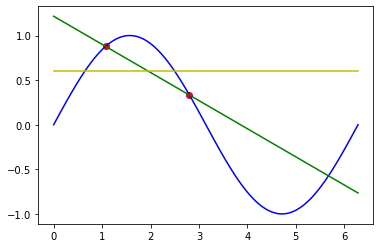

In [219]:
x_train, y_train  = train_data() 
thetas = get_thetas(x_train, y_train)
w = get_w(x_train, y_train)
plot_true_target_function_x_y_h1_h2(x_train, y_train, get_hypothesis_1(thetas), get_hypothesis_2(w))

### Out of Sample Error

The _out of sample error_ $E_{out}(h)$ is the expected error on new unseen data.

$$
E_{out}(h) = \mathbb E_{x,y}[loss(h(x), y)]  = \int_{\mathcal X \times \mathcal Y} loss(h(x), y) p(x,y) dx dy
$$


In our example we don't need to take the expectation w.r.t. $y$ because we have have no noise:

$$
E_{out}(h) = \mathbb E_{x}[loss(h(x), t(x))]  = \int_{\mathcal X } loss(h(x), t(x)) p(x) dx
$$

Here, we will compute the _out of sample error_ $E_{out}(h)$ numerically.      
     
We already have discretized the $x$-axis (`x_grid`) for $p(x)\neq 0$.      
So, to compute the expectation we just need to average over `x_grid` (remember $p(x)$ is uniform).      

$$
E_{out}(h) = \mathbb E_{x}[loss(h(x),t(x))] \approx \frac{1}{m} \sum_{j=1}^{m} loss(h(x^{(j)}), y^{(j)}) 
$$

with
- $m$: number of elements in `x_grid`
- $x^{(j)}$ is the $j$-element of `x_grid`

**Task:**

Implement the function to numerically calculate the out of sample error $E_{out}$ with the mean squared error as loss function.

In [220]:
def out_of_sample_error(y_preds, y):
    return (1/len(y))*np.sum(((y_preds - y)**2))

In [221]:
# If your implementation is correct, these tests should not throw an exception

e_out_h1_test = out_of_sample_error(h1_test(x_grid), y_grid)
np.testing.assert_almost_equal(e_out_h1_test, 11.525485917588728)

### Repeat

**Task:**

Now instead of drawing two examples (one training data set), draw 
now 10.000 times different training sets with two examples.    
Calculate $E_{out}$ for the different $h_1$ and $h_2$ numerically.

For each run, keep track of the following parameters and return them at the end of the function:
- $\{x^{(1)},x^{(2)}\}$
- $\{y^{(1)},y^{(2)}\}$
- $\theta_0$
- $\theta_1$
- $w$
- $E_{out}$


In [222]:
def run_experiment(m, x_grid, y_grid):
    xs = np.ndarray((m,2))
    ys = np.ndarray((m,2))
    t0s = np.ndarray(m)
    t1s = np.ndarray(m)
    ws = np.ndarray(m)
    e_out_h1s = np.ndarray(m)
    e_out_h2s = np.ndarray(m)

    for i in range(m):
        x, y = train_data()
        t = get_thetas(x, y)
        w = get_w(x,y)
        h1 = get_hypothesis_1(t)
        h2 = get_hypothesis_2(w)
        #save values
        xs[i] = x
        ys[i] = y
        t0s[i] = t[0]
        t1s[i] = t[1]
        ws[i] = w
        e_out_h1s[i] = out_of_sample_error(h1(x_grid), y_grid)
        e_out_h2s[i] = out_of_sample_error(h2(x_grid), y_grid)

    return xs, ys, t0s, t1s, ws, e_out_h1s, e_out_h2s

In [223]:
x_grid.shape

(100,)

In [224]:
xs, ys, t0s, t1s, ws, e_out_h1s, e_out_h2s = run_experiment(10000, x_grid, y_grid)

### Average and Plot


Now we can calculate the average of $\theta_0, \theta_1$, $w$ and $E_{out}$ and already plot the resulting averaged $\tilde h_1(x)$ and $\tilde h_2(x)$ together with the target function $sin(x)$.

Your plot should look similar to the one below:

<img src="https://gitlab.com/deep.TEACHING/educational-materials/raw/dev/media/klaus/exercise-bias-variance-sin-h1-h2-avg.png" width="512" alt="internet connection needed">

In [225]:
t0_avg = t0s.mean()
t1_avg = t1s.mean()
thetas_avg = [t0_avg, t1_avg]
w_avg = ws.mean()
h1_avg = get_hypothesis_1(thetas_avg)
h2_avg = get_hypothesis_2(w_avg)
print(thetas_avg)

[0.7923535910286208, -0.2525135062566014]


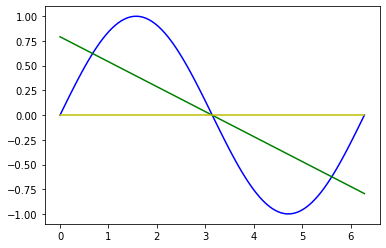

In [226]:
plot_true_target_function_x_y_h1_h2([], [], h1_avg, h2_avg)

In [227]:
expectation_Eout_1 = e_out_h1s.mean()
print ("expectation of E_out of model 1:", expectation_Eout_1)

expectation of E_out of model 1: 1.8718711766152254


In [228]:
expectation_Eout_2 = e_out_h2s.mean()
print ("expectation of E_out of model 2:", expectation_Eout_2)

expectation of E_out of model 2: 0.749811818470164


### Bias

The bias for the mean-squared error is:
$$
bias^2 = \mathbb E_{x,y} \left[(\tilde h(x) - y)^2\right]
$$


The expectation w.r.t. $y$ vanishes if we have no noise:

$$
bias^2 = \mathbb E_x \left[(\tilde h(x) - t(x))^2\right]
$$


with:

- the average hypothesis $\tilde h(x)$

**Task:**

Implement the function to calculate the expecation of the bias$^2$ numerically.

In [229]:
def bias_square(y_true, y_avg):
        """
        Returns the bias^2 of a hypothesis set for the sin-example.

        Parameters:
                y_true(np.array): The y-values of the target function
                                at each position on the x_grid
                y_avg(np.array): The y-values of the avg hypothesis
                                at each position on the x_grid

        Returns:
                variance (double):  Bias^2 of the hypothesis set
        """
        return (1/len(y_true))*np.sum(((y_avg - y_true)**2))

In [230]:
bias_1 = bias_square(y_grid,  h1_avg(x_grid))
print ("Bias of model 1:", bias_1)

Bias of model 1: 0.20920189478320922


In [231]:
bias_2 = bias_square(y_grid,  h2_avg(x_grid))
print ("Bias of model 2:", bias_2)

Bias of model 2: 0.495005370700746


### Variance

Variance for the mean-squared-error:

$$
variance = \mathbb E_D \left[ \mathbb E_x \left[\left(h^D(x) - \tilde h(x)\right)^2 \right] \right]
$$

with:

- the average hypothesis $\tilde h(x)$
- the learned hypothesis $h^D(x)$ for training data set $D$.

**Task:**

Implement the function to calculate the variances for each of the 10.000 experiments and return them as list or array.

Now we benefit from our implementation of `get_w`, `get_thetas`, respectively `get_hypothesis1`,`get_hypothesis2`, which accept and return the same amount of parameters, so we can write a generalized function.


In [232]:
def variances(hypothesis_func, param_func, xs, ys, x_grid, y_avg):
        '''
        Returns the variance of a hypothesis set for the sin-example.

        Parameters:
                hypothesis_func (function): The hypothesis function 1 or 2
                param_func (function): the function to calculate the parameters
                                from the training data, i.e., get_theta or get_w
                xs(np.array): 2D-Array with different training data values for x
                        first dimension: differerent training data sets
                        second dimension: data points in a data set
                ys(np.array): 2D-Array with different training data values for y
                        first dimension: differerent training data sets
                        second dimension: data points in a data set
                x_grid(np.array): The x-values for calculating the expectation E_x
                y_avg(np.array): The y-values of the average hypothesis at the
                                positions of x_grid

        Returns:
                variance (double):  Variance of the hypothesis set for
                                a type for training data
                                (here two examples per training data set)
        '''

        variances = np.ndarray(len(xs))
        for i in range(len(xs)):
                variances[i] = (1/len(xs))*np.sum(((hypothesis_func(param_func(xs[i], ys[i]))(x_grid) - y_avg)**2))
        return variances

In [233]:
var_hypothesis_set_1 = variances(get_hypothesis_1, 
                 get_thetas, 
                 xs, ys, 
                 x_grid, 
                 h1_avg(x_grid))
print(var_hypothesis_set_1)
print(var_hypothesis_set_1.shape)

[0.05190067 0.05642145 0.00058124 ... 0.00794554 0.00323723 0.00165642]
(10000,)


In [234]:
var_hypothesis_set_2 = variances(get_hypothesis_2, 
                 get_w, 
                 xs, ys, 
                 x_grid, 
                 h2_avg(x_grid))
print(var_hypothesis_set_2)
print(var_hypothesis_set_1.shape)

[7.26408188e-03 3.92801907e-03 9.42510510e-06 ... 3.89628640e-04
 2.40627718e-03 5.88547968e-03]
(10000,)


In [235]:
print("model 1: E_out ≈ bias^2 + variance:  %f ≈ %f + %f" % (expectation_Eout_1, bias_1, np.mean(var_hypothesis_set_1)))
print("model 2: E_out ≈ bias^2 + variance:  %f ≈ %f + %f" % (expectation_Eout_2, bias_2, np.mean(var_hypothesis_set_2)))

model 1: E_out ≈ bias^2 + variance:  1.871871 ≈ 0.209202 + 0.016627
model 2: E_out ≈ bias^2 + variance:  0.749812 ≈ 0.495005 + 0.002548


#### Questions

- What do you think is more important for the selection of the appropriate model complexity of the hypothesis set:
 1. Complexity of the target function or
 2. the number of training data

 Number of training data as a small number of training data  force less complex hypothesis sets as the potential for error because of lacking data increases; this goes even moreso for more complex target functions. The complexity of the hypothesis set scales 'linearly' with the complexity of the target function, a small amount of data and, with that, a large in-sample-error influences the complexity of the the hypothesis set more.

- What do you think happens, if the number of training data increases.
  - How change $E_{out}$ of hypothesis sets 1 and 2?

    decreases as the model becomes more accurate
  - How change the bias of hypothesis sets 1 and 2?

    stays the same
  - How change the variance of hypothesis sets 1 and 2?
  
    decreases with $E_{out}$ decreasing

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

Exercise: Bias Variance Tradeoff <br/>
by Christian Herta, Klaus Strohmenger<br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2018 Christian Herta, Klaus Strohmenger

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.